In [1]:
from glob import glob
import json
import os
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import re


In [2]:
# load all en ja zh json file paths
en_text_map_path = 'GAMEDATA/StarRailData/TextMap/TextMapEN.json'
ja_text_map_path = 'GAMEDATA/StarRailData/TextMap/TextMapJP.json'
zh_text_map_path = 'GAMEDATA/StarRailData/TextMap/TextMapCN.json'

# read json file and append to df
# json format: {index: text}
with open(en_text_map_path, 'r', encoding='utf-8') as f:
    en_text_map = pd.DataFrame(json.load(f).items(), columns=['index', 'en'])
with open(ja_text_map_path, 'r', encoding='utf-8') as f:
    ja_text_map = pd.DataFrame(json.load(f).items(), columns=['index', 'ja'])
with open(zh_text_map_path, 'r', encoding='utf-8') as f:
    zh_text_map = pd.DataFrame(json.load(f).items(), columns=['index', 'zh'])

# merge all df
df = pd.merge(en_text_map, ja_text_map, on='index', how='outer')
df = pd.merge(df, zh_text_map, on='index', how='outer')
df

,index,en,ja,zh
0,875924975,Chinese,中国語,汉语
1,-374251478,English,英語,英语
2,-1391003685,Japanese,日本語,日语
3,-1597323374,Korean,韓国語,韩语
4,2059466705,Attachments,メール添付,邮件附件
...,...,...,...,...
82027,-1481032123,NaN,NaN,dev_RB
82028,2078591212,NaN,NaN,dev_R3
82029,861322880,NaN,NaN,dev_RT
82030,1812892502,NaN,NaN,dev_X


In [3]:
# drop duplicate, remove empty lines and nan
df = df.drop_duplicates(subset=['en', 'ja', 'zh'], keep='first')
df = df[df['en'] != '']
df = df[df['ja'] != '']
df = df[df['zh'] != '']
df = df.dropna()
df

,index,en,ja,zh
0,875924975,Chinese,中国語,汉语
1,-374251478,English,英語,英语
2,-1391003685,Japanese,日本語,日语
3,-1597323374,Korean,韓国語,韩语
4,2059466705,Attachments,メール添付,邮件附件
...,...,...,...,...
78644,-373669884,"The Yutie standing there changes every day, bu...",毎日、あそこに立っているのは違う浴鉄なんだよ。今まで気づかなかったでしょ。だって、彼らは厳し...,每天站在那里的浴铁都是不同的人，但你从来都不会发现。因为他们训练严明，每个人都被训练成了一模...
78645,-373669881,"If you catch a glimpse of a Yutie's face, all ...",もし、あなたがある「浴鉄」の顔を見たら、彼らはみんな1つの顔になる。他の人は声も出さずに消え...,不过你如果不识趣地偷看到一位「浴铁」的面孔，他们就会只剩下一副面孔了。其他的人就会不动声色地...
78646,1743574384,"The higher the Weakness Break efficiency is, t...",弱点撃破効率が高いほど、靭性に対するダメージが上がる。,弱点击破效率越高，对韧性造成的伤害就越高。
78647,-272776377,Energy Regeneration Rate can boost the amount ...,EP回復率はキャラクターのスキル発動、敵の殲滅、攻撃を受けた時に獲得するEPをアップさせるこ...,能量恢复效率能够提高角色在施放技能、消灭敌人、受到攻击等行为时获取的能量值。\n这个数值越高...


In [4]:
# drop index column
df = df.drop(columns=['index'])

In [5]:
# remove html tag
df['en'] = df['en'].apply(lambda x: re.sub(r'<[^>]*?>', '', str(x)))
df['ja'] = df['ja'].apply(lambda x: re.sub(r'<[^>]*?>', '', str(x)))
df['zh'] = df['zh'].apply(lambda x: re.sub(r'<[^>]*?>', '', str(x)))
df

,en,ja,zh
0,Chinese,中国語,汉语
1,English,英語,英语
2,Japanese,日本語,日语
3,Korean,韓国語,韩语
4,Attachments,メール添付,邮件附件
...,...,...,...
78644,"The Yutie standing there changes every day, bu...",毎日、あそこに立っているのは違う浴鉄なんだよ。今まで気づかなかったでしょ。だって、彼らは厳し...,每天站在那里的浴铁都是不同的人，但你从来都不会发现。因为他们训练严明，每个人都被训练成了一模...
78645,"If you catch a glimpse of a Yutie's face, all ...",もし、あなたがある「浴鉄」の顔を見たら、彼らはみんな1つの顔になる。他の人は声も出さずに消え...,不过你如果不识趣地偷看到一位「浴铁」的面孔，他们就会只剩下一副面孔了。其他的人就会不动声色地...
78646,"The higher the Weakness Break efficiency is, t...",弱点撃破効率が高いほど、靭性に対するダメージが上がる。,弱点击破效率越高，对韧性造成的伤害就越高。
78647,Energy Regeneration Rate can boost the amount ...,EP回復率はキャラクターのスキル発動、敵の殲滅、攻撃を受けた時に獲得するEPをアップさせるこ...,能量恢复效率能够提高角色在施放技能、消灭敌人、受到攻击等行为时获取的能量值。\n这个数值越高...


In [6]:
# split text by \n
# check if number \n is the same for all languages
# if not, just keep it not split
drop_count = 0
for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):
    en, ja, zh = row.en, row.ja, row.zh
    if not r'\n' in en or not r'\n' in ja or not r'\n' in zh:
        continue
    en_split = en.split(r'\n')
    ja_split = ja.split(r'\n')
    zh_split = zh.split(r'\n')
    if len(en_split) == len(ja_split) == len(zh_split):
        # append to df
        df = pd.concat([df, pd.DataFrame({'en': en_split, 'ja': ja_split, 'zh': zh_split})], ignore_index=True)
        # drop
        df = df.drop(index=i)
        drop_count += 1

print(f'drop {drop_count} rows')
df

/tmp/ipykernel_31024/3780974281.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):


  0%|          | 0/61607 [00:00<?, ?it/s]

drop 2087 rows


,en,ja,zh
0,Chinese,中国語,汉语
1,English,英語,英语
2,Japanese,日本語,日语
3,Korean,韓国語,韩语
4,Attachments,メール添付,邮件附件
...,...,...,...
75853,1. (The following chapter requires payment to ...,1、（次のページ）（読み続ける）,1、（以下章节需付费阅读）（结束选择）
75854,2. (Put the novel down) (Option end),2、（小説をおろす）（選択を終わらせる）,2、（放下小说）（结束选择）
75855,Energy Regeneration Rate can boost the amount ...,EP回復率はキャラクターのスキル発動、敵の殲滅、攻撃を受けた時に獲得するEPをアップさせるこ...,能量恢复效率能够提高角色在施放技能、消灭敌人、受到攻击等行为时获取的能量值。
75856,A higher rate means faster energy regeneration.,この数値が高いほど、キャラクターのEP回復がはやくなる。,这个数值越高，角色能量恢复得越快。


In [7]:
# remove \n
df['en'] = df['en'].apply(lambda x: re.sub(r'\\n', '', str(x)))
df['ja'] = df['ja'].apply(lambda x: re.sub(r'\\n', '', str(x)))
df['zh'] = df['zh'].apply(lambda x: re.sub(r'\\n', '', str(x)))
df

,en,ja,zh
0,Chinese,中国語,汉语
1,English,英語,英语
2,Japanese,日本語,日语
3,Korean,韓国語,韩语
4,Attachments,メール添付,邮件附件
...,...,...,...
75853,1. (The following chapter requires payment to ...,1、（次のページ）（読み続ける）,1、（以下章节需付费阅读）（结束选择）
75854,2. (Put the novel down) (Option end),2、（小説をおろす）（選択を終わらせる）,2、（放下小说）（结束选择）
75855,Energy Regeneration Rate can boost the amount ...,EP回復率はキャラクターのスキル発動、敵の殲滅、攻撃を受けた時に獲得するEPをアップさせるこ...,能量恢复效率能够提高角色在施放技能、消灭敌人、受到攻击等行为时获取的能量值。
75856,A higher rate means faster energy regeneration.,この数値が高いほど、キャラクターのEP回復がはやくなる。,这个数值越高，角色能量恢复得越快。


In [8]:
# remove row with only punctuation
df = df[~df['en'].str.match(r'^[^\w\s]+$')]
df = df[~df['ja'].str.match(r'^[^\w\s]+$')]
df = df[~df['zh'].str.match(r'^[^\w\s]+$')]
df

,en,ja,zh
0,Chinese,中国語,汉语
1,English,英語,英语
2,Japanese,日本語,日语
3,Korean,韓国語,韩语
4,Attachments,メール添付,邮件附件
...,...,...,...
75853,1. (The following chapter requires payment to ...,1、（次のページ）（読み続ける）,1、（以下章节需付费阅读）（结束选择）
75854,2. (Put the novel down) (Option end),2、（小説をおろす）（選択を終わらせる）,2、（放下小说）（结束选择）
75855,Energy Regeneration Rate can boost the amount ...,EP回復率はキャラクターのスキル発動、敵の殲滅、攻撃を受けた時に獲得するEPをアップさせるこ...,能量恢复效率能够提高角色在施放技能、消灭敌人、受到攻击等行为时获取的能量值。
75856,A higher rate means faster energy regeneration.,この数値が高いほど、キャラクターのEP回復がはやくなる。,这个数值越高，角色能量恢复得越快。


In [9]:
# remove lines with only numbers
df = df[~df['en'].str.match(r'^\d+$')]
df = df[~df['ja'].str.match(r'^\d+$')]
df = df[~df['zh'].str.match(r'^\d+$')]
df

,en,ja,zh
0,Chinese,中国語,汉语
1,English,英語,英语
2,Japanese,日本語,日语
3,Korean,韓国語,韩语
4,Attachments,メール添付,邮件附件
...,...,...,...
75853,1. (The following chapter requires payment to ...,1、（次のページ）（読み続ける）,1、（以下章节需付费阅读）（结束选择）
75854,2. (Put the novel down) (Option end),2、（小説をおろす）（選択を終わらせる）,2、（放下小说）（结束选择）
75855,Energy Regeneration Rate can boost the amount ...,EP回復率はキャラクターのスキル発動、敵の殲滅、攻撃を受けた時に獲得するEPをアップさせるこ...,能量恢复效率能够提高角色在施放技能、消灭敌人、受到攻击等行为时获取的能量值。
75856,A higher rate means faster energy regeneration.,この数値が高いほど、キャラクターのEP回復がはやくなる。,这个数值越高，角色能量恢复得越快。


In [10]:
# remove lines that tokens is more than 256 or less than 1
from transformers import MT5TokenizerFast
tokenizer = MT5TokenizerFast.from_pretrained('google/mt5-small')

df['en_len'] = df['en'].apply(lambda x: len(tokenizer.tokenize(x)))
df['ja_len'] = df['ja'].apply(lambda x: len(tokenizer.tokenize(x)))
df['zh_len'] = df['zh'].apply(lambda x: len(tokenizer.tokenize(x)))
df

/home/toshihiko/anaconda3/envs/pytorch201/lib/python3.8/site-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


,en,ja,zh,en_len,ja_len,zh_len
0,Chinese,中国語,汉语,1,2,3
1,English,英語,英语,1,2,2
2,Japanese,日本語,日语,1,2,3
3,Korean,韓国語,韩语,2,2,2
4,Attachments,メール添付,邮件附件,3,3,4
...,...,...,...,...,...,...
75853,1. (The following chapter requires payment to ...,1、（次のページ）（読み続ける）,1、（以下章节需付费阅读）（结束选择）,17,9,14
75854,2. (Put the novel down) (Option end),2、（小説をおろす）（選択を終わらせる）,2、（放下小说）（结束选择）,11,14,10
75855,Energy Regeneration Rate can boost the amount ...,EP回復率はキャラクターのスキル発動、敵の殲滅、攻撃を受けた時に獲得するEPをアップさせるこ...,能量恢复效率能够提高角色在施放技能、消灭敌人、受到攻击等行为时获取的能量值。,41,25,27
75856,A higher rate means faster energy regeneration.,この数値が高いほど、キャラクターのEP回復がはやくなる。,这个数值越高，角色能量恢复得越快。,12,14,14


In [11]:
df = df[df['en_len'] <= 256]
df = df[df['ja_len'] <= 256]
df = df[df['zh_len'] <= 256]
df = df[df['en_len'] >= 1]
df = df[df['ja_len'] >= 1]
df = df[df['zh_len'] >= 1]
df

,en,ja,zh,en_len,ja_len,zh_len
0,Chinese,中国語,汉语,1,2,3
1,English,英語,英语,1,2,2
2,Japanese,日本語,日语,1,2,3
3,Korean,韓国語,韩语,2,2,2
4,Attachments,メール添付,邮件附件,3,3,4
...,...,...,...,...,...,...
75853,1. (The following chapter requires payment to ...,1、（次のページ）（読み続ける）,1、（以下章节需付费阅读）（结束选择）,17,9,14
75854,2. (Put the novel down) (Option end),2、（小説をおろす）（選択を終わらせる）,2、（放下小说）（结束选择）,11,14,10
75855,Energy Regeneration Rate can boost the amount ...,EP回復率はキャラクターのスキル発動、敵の殲滅、攻撃を受けた時に獲得するEPをアップさせるこ...,能量恢复效率能够提高角色在施放技能、消灭敌人、受到攻击等行为时获取的能量值。,41,25,27
75856,A higher rate means faster energy regeneration.,この数値が高いほど、キャラクターのEP回復がはやくなる。,这个数值越高，角色能量恢复得越快。,12,14,14


In [12]:
# remove lines that LaBSE score is less than 0.6 or more than 0.99
import numpy as np
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/LaBSE').cuda()


_batch, _scores = [], []
_bs = 64
for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):
    inputs = [row.en, row.ja, row.zh]
    _batch.extend(inputs)
    if (i+1) % _bs == 0 or i == df.shape[0]-1:
        embeddings = model.encode(_batch)
        # calculate score between each pair
        for j in range(embeddings.shape[0]//3):
            _scores.append(np.average([
                np.matmul(embeddings[j*3], embeddings[j*3+1].T),
                np.matmul(embeddings[j*3], embeddings[j*3+2].T),
                np.matmul(embeddings[j*3+1], embeddings[j*3+2].T)
            ]))
        _batch = []
df = df.assign(score=_scores)
df

/tmp/ipykernel_31024/115076287.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):


  0%|          | 0/70368 [00:00<?, ?it/s]

,en,ja,zh,en_len,ja_len,zh_len,score
0,Chinese,中国語,汉语,1,2,3,0.913975
1,English,英語,英语,1,2,2,0.951441
2,Japanese,日本語,日语,1,2,3,0.956051
3,Korean,韓国語,韩语,2,2,2,0.934823
4,Attachments,メール添付,邮件附件,3,3,4,0.675397
...,...,...,...,...,...,...,...
75853,1. (The following chapter requires payment to ...,1、（次のページ）（読み続ける）,1、（以下章节需付费阅读）（结束选择）,17,9,14,0.708806
75854,2. (Put the novel down) (Option end),2、（小説をおろす）（選択を終わらせる）,2、（放下小说）（结束选择）,11,14,10,0.894131
75855,Energy Regeneration Rate can boost the amount ...,EP回復率はキャラクターのスキル発動、敵の殲滅、攻撃を受けた時に獲得するEPをアップさせるこ...,能量恢复效率能够提高角色在施放技能、消灭敌人、受到攻击等行为时获取的能量值。,41,25,27,0.827316
75856,A higher rate means faster energy regeneration.,この数値が高いほど、キャラクターのEP回復がはやくなる。,这个数值越高，角色能量恢复得越快。,12,14,14,0.684268


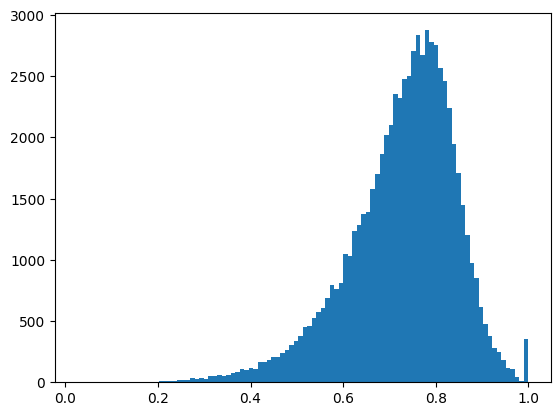

In [13]:
# statistics score using matplotlib
import matplotlib.pyplot as plt
plt.hist(df['score'], bins=100)
plt.show()

In [14]:
# remove lines that LaBSE score is less than 0.6 or more than 0.99
df = df[df['score'] >= 0.6]
df = df[df['score'] <= 0.99]
df

,en,ja,zh,en_len,ja_len,zh_len,score
0,Chinese,中国語,汉语,1,2,3,0.913975
1,English,英語,英语,1,2,2,0.951441
2,Japanese,日本語,日语,1,2,3,0.956051
3,Korean,韓国語,韩语,2,2,2,0.934823
4,Attachments,メール添付,邮件附件,3,3,4,0.675397
...,...,...,...,...,...,...,...
75853,1. (The following chapter requires payment to ...,1、（次のページ）（読み続ける）,1、（以下章节需付费阅读）（结束选择）,17,9,14,0.708806
75854,2. (Put the novel down) (Option end),2、（小説をおろす）（選択を終わらせる）,2、（放下小说）（结束选择）,11,14,10,0.894131
75855,Energy Regeneration Rate can boost the amount ...,EP回復率はキャラクターのスキル発動、敵の殲滅、攻撃を受けた時に獲得するEPをアップさせるこ...,能量恢复效率能够提高角色在施放技能、消灭敌人、受到攻击等行为时获取的能量值。,41,25,27,0.827316
75856,A higher rate means faster energy regeneration.,この数値が高いほど、キャラクターのEP回復がはやくなる。,这个数值越高，角色能量恢复得越快。,12,14,14,0.684268


In [15]:
# replace「」to “”, 『』to ‘’ in zh
df['zh'] = df['zh'].apply(lambda x: x.replace('「', '“'))
df['zh'] = df['zh'].apply(lambda x: x.replace('」', '”'))
df['zh'] = df['zh'].apply(lambda x: x.replace('『', '‘'))
df['zh'] = df['zh'].apply(lambda x: x.replace('』', '’'))
df

,en,ja,zh,en_len,ja_len,zh_len,score
0,Chinese,中国語,汉语,1,2,3,0.913975
1,English,英語,英语,1,2,2,0.951441
2,Japanese,日本語,日语,1,2,3,0.956051
3,Korean,韓国語,韩语,2,2,2,0.934823
4,Attachments,メール添付,邮件附件,3,3,4,0.675397
...,...,...,...,...,...,...,...
75853,1. (The following chapter requires payment to ...,1、（次のページ）（読み続ける）,1、（以下章节需付费阅读）（结束选择）,17,9,14,0.708806
75854,2. (Put the novel down) (Option end),2、（小説をおろす）（選択を終わらせる）,2、（放下小说）（结束选择）,11,14,10,0.894131
75855,Energy Regeneration Rate can boost the amount ...,EP回復率はキャラクターのスキル発動、敵の殲滅、攻撃を受けた時に獲得するEPをアップさせるこ...,能量恢复效率能够提高角色在施放技能、消灭敌人、受到攻击等行为时获取的能量值。,41,25,27,0.827316
75856,A higher rate means faster energy regeneration.,この数値が高いほど、キャラクターのEP回復がはやくなる。,这个数值越高，角色能量恢复得越快。,12,14,14,0.684268


In [16]:
# drop len and score column
df = df.drop(columns=['en_len', 'ja_len', 'zh_len', 'score'])
# save to parquet
df.to_parquet('parquet/StarRailTextMap.parquet', index=False)

In [17]:
# load parquet
df = pd.read_parquet('parquet/StarRailTextMap.parquet')
df

,en,ja,zh
0,Chinese,中国語,汉语
1,English,英語,英语
2,Japanese,日本語,日语
3,Korean,韓国語,韩语
4,Attachments,メール添付,邮件附件
...,...,...,...
60821,1. (The following chapter requires payment to ...,1、（次のページ）（読み続ける）,1、（以下章节需付费阅读）（结束选择）
60822,2. (Put the novel down) (Option end),2、（小説をおろす）（選択を終わらせる）,2、（放下小说）（结束选择）
60823,Energy Regeneration Rate can boost the amount ...,EP回復率はキャラクターのスキル発動、敵の殲滅、攻撃を受けた時に獲得するEPをアップさせるこ...,能量恢复效率能够提高角色在施放技能、消灭敌人、受到攻击等行为时获取的能量值。
60824,A higher rate means faster energy regeneration.,この数値が高いほど、キャラクターのEP回復がはやくなる。,这个数值越高，角色能量恢复得越快。
